Developer: ... <br>
Created on: Jan 19, 2021<br>
Description: Colab notebook to perform Machine Learning on Iris Dataset

# Reading and Preparing the Data

In [5]:
# Import the modules
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [7]:
# Read the dataset
# {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df = pd.read_excel('iris_dataset.xlsx')
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


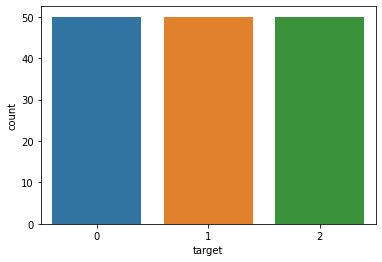

In [8]:
# Find how many training data for each class
sns.countplot(df["target"])

In [9]:
# Prepare X and Y
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                 'petal width (cm)']

X = df[feature_names]
y = df['target']

print(X.shape, y.shape)

(150, 4) (150,)


In [10]:
# Split the dataset into training and testing dataset (for test keep 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
print(X_train.shape, X_test.shape)

(105, 4) (45, 4)


# Training and finding the best the model

In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

MODELS = [('SVC', SVC),
          ('AdaBoost', AdaBoostClassifier),
          ('GaussianNB', GaussianNB),
          ('QDA', QuadraticDiscriminantAnalysis),
          ('RandomForest', RandomForestClassifier)
          ]

In [15]:
for name, model in MODELS:

    # Define the model
    modelMethod = model()

    # Train the model
    modelMethod.fit(X_train, y_train)

    # Predict the model
    test_pred = modelMethod.predict(X_test)
    train_pred = modelMethod.predict(X_train)

    # Calculate the training and test scores
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    # Print the Accuracy
    print(name, round(train_acc, 2), round(test_acc, 2))

SVC 0.97 0.98
AdaBoost 0.96 0.96
GaussianNB 0.95 0.98
QDA 0.97 1.0
RandomForest 1.0 0.98


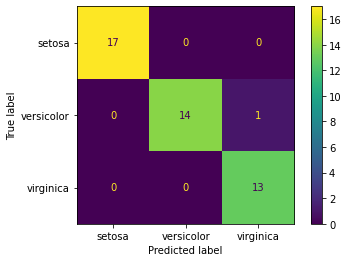

In [23]:
from sklearn.metrics import plot_confusion_matrix
pcm = plot_confusion_matrix(modelMethod, X_test, y_test, display_labels=['setosa','versicolor','virginica'])

# Cool thing about Colab

In [ ]:
import folium

# Specify the coordinates
coords = (26.355832685680443, -80.1085605388001)

# Show it in a map
map = folium.Map(location=coords, width='50%', zoom_start=15,
                 # tiles='Stamen Terrain'
                )
folium.Marker(coords).add_to(map)
map

# More cool thing about Colab

In [ ]:
from shapely.geometry import Point
import folium

# Specify the coordinates
coords = (26.355832685680443, -80.1085605388001)
buff_value = 0.001  # 0.001° = 111m 

# Construct the point and buffer
pt = Point(coords[::-1])
buff = pt.buffer(buff_value)

# Show it in a map
map = folium.Map(location=coords, width='50%', zoom_start=15)
folium.Marker(coords).add_to(map)
folium.GeoJson(buff).add_to(map)
map